In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [49]:
import zipfile

with zipfile.ZipFile('../input/dogs-vs-cats/test1.zip', 'r') as zip_ref:
    
    zip_ref.extractall('./')
    
with zipfile.ZipFile('../input/dogs-vs-cats/train.zip', 'r') as zip_ref:
    
    zip_ref.extractall('./')

## directory will give all the images name:

In [74]:
directory=os.listdir('./train')
cats=[]
dogs=[]
for label in directory:
    #category = label.split('.')[0]
    if label.split('.')[0] == 'dog':
        dogs.append(label)
    else:
        cats.append(label)
        

## images of cat in cats folder and dog in dogs folder

In [89]:
#train='./train/'
dog_path=[]
for x in dogs:
    dog_path.append('./train/'+x)
   

In [91]:
cat_path=[]
for x in cats:
    cat_path.append('./train/'+x)

In [118]:
len(dog_path)

12500

In [119]:
len(cat_path)

12500

In [120]:
12500*2

25000

# whole path of the image file:****

## now let's label tyhem:

In [140]:
img_size=100
data=[]
for x in dog_path:
    img_arr=cv2.imread(x)
    img_arr=cv2.resize(img_arr,(img_size,img_size))
    data.append([img_arr,0])

In [144]:
img_size=100

for x in cat_path:
    img_arr=cv2.imread(x)
    img_arr=cv2.resize(img_arr,(img_size,img_size))
    data.append([img_arr,1])

In [145]:
len(data)

25000

In [146]:
import random

In [147]:
random.shuffle(data)

In [148]:
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)

In [149]:
y[0]

1

0


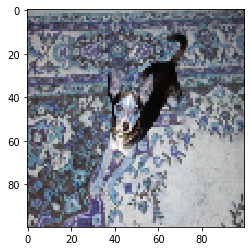

In [153]:
from matplotlib import pyplot as plt
plt.imshow(x[1500], interpolation='nearest')
print(y[1500])
plt.show()

In [155]:
import numpy as np

In [156]:
x=np.array(x)
y=np.array(y)

In [158]:
x=x/255

In [159]:
x.shape

(25000, 100, 100, 3)

In [160]:
y.shape

(25000,)

In [161]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [163]:
model=Sequential()

In [164]:
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D((2,2)))

In [165]:
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D((2,2)))


In [166]:
model.add(Flatten())

In [167]:
model.add(Dense(units=128,activation='sigmoid',input_dim=x.shape[1:]))


In [168]:
model.add(Dense(units=2,activation='softmax'))

In [169]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [170]:
model.fit(x,y,epochs=5,validation_split=0.1)

2021-11-13 06:27:26.183880: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
704/704 [==============================] - 173s 244ms/step - loss: 0.6474 - accuracy: 0.6205 - val_loss: 0.5626 - val_accuracy: 0.7140
Epoch 2/5
704/704 [==============================] - 174s 247ms/step - loss: 0.5183 - accuracy: 0.7407 - val_loss: 0.5103 - val_accuracy: 0.7504
Epoch 3/5
704/704 [==============================] - 173s 245ms/step - loss: 0.4463 - accuracy: 0.7882 - val_loss: 0.4698 - val_accuracy: 0.7788
Epoch 4/5
704/704 [==============================] - 171s 243ms/step - loss: 0.3950 - accuracy: 0.8220 - val_loss: 0.4235 - val_accuracy: 0.7964
Epoch 5/5
704/704 [==============================] - 171s 242ms/step - loss: 0.3460 - accuracy: 0.8459 - val_loss: 0.4343 - val_accuracy: 0.8000
